In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

- matplotlib: グラフや図を作成するためのライブラリ
- torch: 深層学習フレームワークであるPyTorchの本体
- torchvision: PyTorch専用の画像処理ライブラリ

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


このコードブロックは, 画像データの前処理と変換を行うための処理　　
- `transforms.Compose` は, 複数の変換処理を順番に実行するための関数.  
- `transforms.ToTensor()` は, PIL Image 形式の画像データを PyTorch の Tensor 形式に変換します. Tensor 形式は, 深層学習モデルで計算を行うために適した形式.  
    - データ形式の変換: PIL Image 形式のデータは, $0$ ～ $1$ の範囲の数値で表現されるが, Tensor 形式では $-1$ ～ $1$ の範囲の数値に変換される.  
    - チャネルの並べ替え: カラー画像の場合、PIL Image 形式では (R, G, B) の順序でチャネルが並んでいる. 一方, Tensor 形式では (C, H, W) の順序でチャネルが並んでいる. この関数は, チャネルの並べ替えを (C, H, W) に行う.  
    - テンソルへの変換: データ形式とチャネルの並べ替えを行った後, データを PyTorch Tensor 形式に変換する.  
- `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` は, 画像データの各ピクセル値を正規化する. 正規化とは, 各ピクセル値の平均を $0.5$ に、標準偏差を $0.5$ に調整する処理. この処理により, モデルが学習しやすくなる.  

- 訓練データセットの作成 `torchvision.datasets.CIFAR10` 関数  
    - `root='./data` : データセットを保存するディレクトリを `./data` に設定する. このディレクトリが存在しない場合は, 自動的に作成される.  
    - `train=True` : 訓練データセットを作成することを指定する. テストデータセットを作成するには, `train=False` を設定する.  
    - `download=True` : データセットが存在しない場合は, 自動的にダウンロードすることを指定する.  
    - `transform=transform` : 前処理と変換で定義した処理をデータセットに適用することを指定する.  

- 訓練データローダーの作成 `torch.utils.data.DataLoader` 関数
    - `dataset`: 訓練データセット `trainset` を指定する.  
    - `batch_size`: ミニバッチのサイズを $4$ に設定する. つまり, $4$ 枚の画像を $1$ つのミニバッチとして処理する.  
    - `shuffle`: データセットをシャッフルすることを指定する. これは, モデルがデータの偏りに影響を受けないようにするために重要.  
    - `num_workers`: データの読み込みに使用するワーカースレッドの数を $2$ に設定する. つまり, $2$ つのスレッドを並行処理で使用してデータを読み込む.  

- テストデータセットの作成 `torchvision.datasets.CIFAR10` 関数  
訓練データと同様

- テストデータローダーの作成 `torch.utils.data.DataLoader` 関数  
訓練データと同様

**データローダーとは** 
- データの読み込み: データセットからデータをミニバッチと呼ばれる小さなまとまりのデータに分割し, 順番に読み込む.  
- データの前処理: 必要に応じて, データの前処理 (正規化、標準化など) を行う.  
- データの転送: データを GPU などの計算デバイスに転送する.  

**ミニバッチとは**
深層学習モデルの訓練や評価時に使用する小さなまとまりのデータである.  
計算量の削減, メモリ使用量の削減, 学習速度の向上などのメリットがある.  

**テストデータセットとは**
テストデータセットは, 深層学習モデルの性能を評価するために使用されるデータセット.  
訓練データセットとは異なるデータを使用してモデルを評価することで, モデルが汎化性能を持っているかどうかを確認することができる.

**ワーカースレッドとは**  
ワーカースレッドは, コンピュータプログラムにおいて, 処理を並行して実行するために使用されるスレッドの一種.  
メインスレッドとは別に独立して動作し, 特定のタスクを実行するように指示される.  
ワーカースレッドを使用することで, プログラム全体の処理速度を向上させ, 応答性を改善することができる.

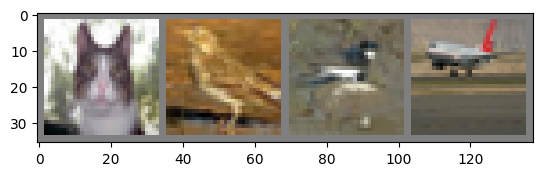

  cat  bird  bird plane


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 画像の表示関数


def imshow(img):
    img = img / 2 + 0.5     # 正規化を戻す
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 適当な訓練セットの画像を取得
for data in trainloader:
    images, labels = data
    break  # デモ用に1つのバッチのみ処理

# 画像の表示
imshow(torchvision.utils.make_grid(images))

# ラベルの表示
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

- 画像表示関数 `imshow` の定義  
    - `img = img / 2 + 0.5` : この式は, 画像データの正規化を元に戻す. 訓練時にデータの値域を $0$ から $1$ に正規化していた場合, この式で元に戻すことができる.  
    - `npimg = img.numpy()` : この式は, PyTorchのテンソル形式のデータを, NumPyの配列に変換する. `Matplotlib` は `NumPy` の配列を扱えるため, この変換が必要になる.  
    - `plt.imshow(np.transpose(npimg, (1, 2, 0)))` : この式は, `NumPy` の配列を `Matplotlib` で表示できる形式に変換し, 画像として表示する. `PyTorch` と `Matplotlib` では, 画像のチャンネルの並び方が異なるため, `np.transpose` を使って並び替えを行っている.  
    - `plt.show()` : この式は, `Matplotlib` で作成した画像を表示する.   

- 訓練セットの画像取得  
この部分は、訓練データセットから1つのバッチ分の画像とラベルを取得する.  
`trainloader` : 訓練データセットを読み込むためのローダー  
`images` : バッチ中の画像データ  
`labels` : バッチ中のラベルデータ  

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

- ライブラリのインポート
    - `torch.nn` : ニューラルネットワーク構築のためのモジュール
    - `torch.nn.functional` :よく使う活性化関数やプーリング層などの機能をインポート

- Netクラスの定義
`Net` という名前でクラスを定義している. これは, ニューラルネットワーク全体のモデルを表す.  
`nn.Module` を継承することで, `PyTorch`が認識できるモデルとして定義される.  

- __init__ 関数は, モデルの初期化処理を定義する. ここで, モデルのパラメータとなる畳み込み層 (Conv2d) や線形層 (Linear) をインスタンス化し, 属性として保持する. 
    - `self.conv1` : 入力チャネル数 $3$ , 出力チャネル数 $6$ , カーネルサイズ $5\times 5$ の畳み込み層
    - `self.pool` : $2\times 2$ のプーリング層
    - `self.conv2` : 入力チャネル数 $6$ , 出力チャネル数 $16$ カーネルサイズ $5\times 5$ の畳み込み層
    - `self.fc1` : $16 * 5 * 5$ 個の入力を $120$ 個の出力に変換する線形層
    - `self.fc2` : $120$ 個の入力を $84$ 個の出力に変換する線形層
    - `self.fc3` : $84$ 個の入力を $10$ 個の出力に変換する線形層

- `forward` 関数は, モデルに入力されたデータに対してどのような処理を行うかを定義する. これが, モデルの推論過程で実際に実行される部分. `x` は、モデルに入力されるデータ (テンソル) を表す. 
    - `self.conv1(x)` : 畳み込み層 $1$ で入力データと畳み込み演算を行い, 特徴マップを出力する.
    - `F.relu(self.conv1(x))` : ReLU活性化関数を用いて, 非線形性を導入.
    - `self.pool(F.relu(self.conv1(x)))` : プーリング層で特徴マップを縮小し, 空間的な情報を圧縮する.
    - `self.conv2(x)` : 畳み込み層 $2$ で特徴マップと畳み込み演算を行い, 特徴マップを出力する.
    - `F.relu(self.conv2(x))` : ReLU活性化関数を用いて、非線形性を導入します。
    - `self.pool(F.relu(self.conv2(x)))` : プーリング層で特徴マップを縮小し, 空間的な情報を圧縮する.
    - `x.view(-1, 16 * 5 * 5)` : $3$ 次元テンソルを $1$ 次元に平坦化し, 全結合層の入力に適した形状に変換.
    - `F.relu(self.fc1(x))` : 全結合層 $1$


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

このコードは, PyTorchモデルの訓練に必要な最適化アルゴリズムと損失関数を設定する部分.  

1. 損失関数の設定：criterion = nn.CrossEntropyLoss()
- `nn.CrossEntropyLoss()` : 交差エントロピー損失関数を定義する. これは, 多クラス分類タスクにおいてよく用いられる損失関数.
    - 複数クラスへの分類問題において, モデルが誤ったクラスを推論した場合にどのくらい誤っているかを評価する. 
    - 具体的な計算式は複雑ですが, モデルの予測確率と正解ラベルとの間の情報量に基づいて算出される.

2. 最適化アルゴリズムの設定：`optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)`
- `optim.SGD` : 確率的勾配降下法 (SGD) という最適化アルゴリズムを定義. これは, ニューラルネットワークの訓練において最も基本的なアルゴリズムの一つ.
    - モデルのパラメータを更新することで, 損失関数を最小化するようにモデルを学習させる.
    - 具体的には, 勾配と呼ばれるパラメータの変化量を計算し, その逆方向にパラメータを更新していく.
- `net.parameters()` : モデルのパラメータを取得する.
- `lr=0.001` : 学習率を設定する. これは, パラメータ更新の大きさを制御するパラメータであり, $0.001$ という値は一般的な設定.
- `momentum=0.9` : モメンタムを設定. これは, 過去の更新方向を考慮したパラメータ更新を行うためのパラメータであり, $0.9$ という値は安定した学習に役立つと言われている.

In [7]:
for epoch in range(2):  # エポック数分ループを回します

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # データセットのデータを [inputs, labels]の形で取得
        inputs, labels = data

        # パラメータの勾配をリセット
        optimizer.zero_grad()

        # 順伝搬＋逆伝搬＋パラメータ更新
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 統計情報の表示
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2,000ミニバッチにつき1度表示
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.165
[1,  4000] loss: 1.891
[1,  6000] loss: 1.690
[1,  8000] loss: 1.623
[1, 10000] loss: 1.537
[1, 12000] loss: 1.497
[2,  2000] loss: 1.416
[2,  4000] loss: 1.381
[2,  6000] loss: 1.342
[2,  8000] loss: 1.330
[2, 10000] loss: 1.298
[2, 12000] loss: 1.287
Finished Training



このコードは, ニューラルネットワークモデルを訓練するための主要な部分である訓練ループを記述している.  

1. エポックループ：`for epoch in range(2)`
- このループは, エポックと呼ばれる単位でモデルを訓練する.
- 今回のコードでは, `range(2)` で指定されているように, 2エポック分の訓練が行われる. 
- 1つのエポックでは, 訓練データセット全体を用いてモデルを学習させる. 

2. ミニバッチループ：`for i, data in enumerate(trainloader, 0)`
- このループは, 訓練データセットをミニバッチと呼ばれる小さなデータ塊に分割し, 順々に処理していく. 
- `enumerate` 関数は, 各ミニバッチのインデックス `i` とそのミニバッチ `data` を取得するために使用される. 
- 1つのエポック中には, 訓練データセット全体をミニバッチ数だけ分割して処理することになる. 

3. ミニバッチ処理：`inputs, labels = data`
- `data` は, ミニバッチ内のデータとラベルをタプル形式で格納している. 
- `inputs` は, モデルに入力する**画像データ**を表す. 
- `labels` は, 各画像に対応する**正解ラベル**を表す. 

4. 勾配初期化：`optimizer.zero_grad()`
- 各ミニバッチの処理前に, モデルのパラメータの勾配を初期化. 
- 勾配は, モデルのパラメータを更新する際に必要となる情報であり, 初期化しないと過去の更新の影響が残ってしまう. 
- `optimizer.zero_grad()` は, 最適化アルゴリズム (SGD) における勾配初期化処理を実行する. 

5. 順伝搬：`outputs = net(inputs)`
- 入力データ `inputs` をモデル `net` に入力し, 順伝搬を実行します. 
- 順伝搬とは, 入力データからモデルの出力まで計算を行う処理. 
- この処理により, モデルが各画像に対してどのようなクラスを予測するのかを出力 `outputs` として得ることができる. 

6. 損失計算：`loss = criterion(outputs, labels)`
- モデルの予測出力 `outputs` と正解ラベル `labels` を用いて, 損失を計算します. 
- 損失は, モデルの予測と正解の誤差を数値化したものであり, この値を最小化することでモデルの精度を向上させることができます. 
- 今回のコードでは, `nn.CrossEntropyLoss()` 関数を使用しており, これは多クラス分類タスクにおける一般的な損失関数です. 

7. 逆伝搬：`loss.backward()`
- 計算された損失 `loss` を用いて, 逆伝搬を実行します. 
- 逆伝搬とは, 損失が各パラメータに対してどの程度の影響を与えているのかを計算する処理です. 
- この処理により, 勾配が算出され, モデルのパラメータを更新するための準備が整います. 

8. パラメータ更新：`optimizer.step()`
- 算出された勾配を用いて, モデルのパラメータを更新します. 
- この処理により, モデルは学習が進み, より正確な予測ができるように進化していきます. 
- `optimizer.step()` は, 最適化アルゴリズム (SGD) におけるパラメータ更新処理を実行します. 

9. 統計情報の表示：`if i % 2000 == 1999:`
- 2000ミニバッチごとに, 平均損失を表示します. 
- 平均損失は, 現在の訓練状況を把握するための指標として役立ちます. 
- `%d` はエポック番号, `%5d` はミニバッチ番号, `%.3f` は損失の値を表すフォーマット指定子です. 

10. 訓練完了：`print('Finished Training')`
- すべてのエポックが完了したら, `Finished Training` と表示して訓練完了を知らせます. 

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

このコードは, 訓練済みのPyTorchモデルをファイルに保存する処理です. 

1. 保存先のパス設定：`PATH = './cifar_net.pth'`
- `PATH` 変数に, モデルを保存するファイルのパスを設定します. 
- 今回は, `./cifar_net.pth` という名前で, 現在のディレクトリ直下に保存します. 

2. モデル状態の取得：`net.state_dict()`
- `net.state_dict()` メソッドを呼び出すことで, モデルの状態を取得します. 
- モデルの状態には, モデルのパラメータや学習情報などが含まれます. 
- これらの情報は, モデルを復元したり, 他の環境で利用したりするために必要となります. 

3. モデル保存：`torch.save(net.state_dict(), PATH)`
- `torch.save()` 関数を使用して, モデル状態を指定したパスに保存します. 
- 第一引数には, 保存したいデータ (今回はモデル状態) を指定します. 
- 第二引数には, 保存先のパスを指定します. 

4. 保存処理の役割
- 訓練済みのモデルを保存することで, 以下の利点があります. 
    - 再利用: 訓練済みのモデルを再度利用したい場合, ファイルから読み込むことで, 再訓練せずに利用することができます. 
    - 共有: 訓練済みのモデルを他の人と共有したい場合, ファイルを共有することで簡単に共有することができます. 
    - デプロイ: 訓練済みのモデルを本番環境にデプロイしたい場合, ファイルをデプロイすることで利用することができます. 



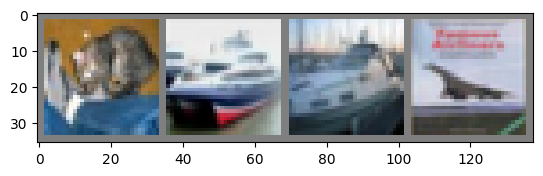

GroundTruth:    cat  ship  ship plane


In [9]:
# 適当な訓練セットの画像を取得
for data in testloader:
    images, labels = data
    break  # Only process one batch for demonstration

# 画像の表示
imshow(torchvision.utils.make_grid(images))

# ラベルの表示
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

このコードは, テストデータセットから一部の画像を取得し, それらを表示し, それらの画像ラベルを表示することを行っている.  

1. テストデータの取得：`for data in testloader:`
- `testloader` は, テストデータセットをミニバッチに分割したイテレータです. 
- このループは, テストデータセット内の1つのミニバッチのみ処理します. 
- これは, デモ目的でコードを簡素化するために行っています. 
- 実際のテストでは, すべてのミニバッチを処理する必要があります. 
- `data` は, ミニバッチ内の画像データとラベルをタプル形式で格納しています. 
- `images` は, モデルに入力する画像データを表します. 
- `labels` は, 各画像に対応する正解ラベルを表します. 
- `break` ステートメントによって, ループを1回のみ実行し, 1つのミニバッチのみ処理するようにしています. 

2. 画像の表示：`imshow(torchvision.utils.make_grid(images))`
- `torchvision.utils.make_grid()` 関数を使用して, ミニバッチ内の複数画像を1つのグリッド画像にまとめます. 
- `imshow()` 関数を使用して, グリッド画像を画面に表示します. 
- この処理により, 実際にモデルに与えられた画像を確認することができます. 

3. ラベルの表示：`print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))`
- `labels` から4つの画像のラベルを取り出し, それぞれを文字列に変換します. 
- `classes` は, ラベルに対応するクラス名称のリストです. 
- `' '.join()` 関数を使用して, 文字列をスペースで区切って結合します. 
- `print()` 関数を使用して, 結合された文字列を出力し, 正解ラベルを表示します. 


In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

このコードは, 保存済みのPyTorchモデルをファイルから読み込んで, 現在のプログラムで使用できるようにする処理です. 

1. モデルインスタンスの生成：`net = Net()`

- まず, `Net` クラスを使って新しいモデルインスタンス `net` を生成します. 
- これは, モデルの構造を定義したクラスに基づいて, 空のモデルを作成する処理です. 

2. モデル状態の読み込み：`net.load_state_dict(torch.load(PATH))`

- `torch.load()` 関数を使用して, `PATH` で指定されたファイルからモデル状態を読み込みます. 
- モデル状態には, モデルのパラメータや学習情報などが含まれています. 
- 読み込まれたモデル状態は, `net` という変数に格納されます. 

In [11]:
outputs = net(images)

このコードは, 訓練済みのPyTorchモデルを用いて画像を推論し, その結果を出力する処理.

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


このコードは, PyTorchモデルの推論結果から各画像の予測ラベルを導き出し, それを可読な形式で表示する処理です. 

1. 確率の最大値とインデックス取得：`_, predicted = torch.max(outputs, 1)`

- `torch.max()` 関数を使用して, `outputs` テンソルにおける各行の最大値とそのインデックスを取得します. 
    - `outputs` は, モデルの推論結果である各クラスごとの予測確率を格納したテンソルです. 
    - `dim=1` を指定することで, 各行 (画像) の最大値のみを計算します. 
- 取得結果は, 2つのタプル `_` と `predicted` に格納されます. 
    - `_` は, 最大値そのもの (数値) を格納しますが, 今回は使用しないので無視します. 
    - `predicted` は, 各行の最大値に対応するインデックス (クラス番号) を格納します. 

2. クラス予測の取得：`classes[predicted[j]]`

- `classes` は, 各インデックスに対応するクラス名称のリストです. 
- `predicted[j]` は, j番目の画像の予測クラス番号を表します. 
- `classes[predicted[j]]` は, j番目の画像の予測クラス名称を表します. 

3. 予測結果の表示：`print('Predicted: ', ' '.join(...))`

- `print()` 関数を使用して, 予測クラス名称をスペース区切りで結合した文字列を出力します. 
    - `' '.join()` 関数は, リスト内の要素をスペースで結合するために使用されます. 
    - `classes[predicted[j]]` は, 上記で説明したように, j番目の画像の予測クラス名称を表します. 
    - `for j in range(4)` は, 4つの画像に対してループ処理を行い, それぞれの予測クラス名称を出力します. 


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


このコードは, 訓練済みのPyTorchモデルを用いてテストデータを推論し, その結果に基づいてモデルの精度を評価する処理です.  

1. 変数初期化
- `correct` 変数は, 正しく分類された画像の数を初期化します.  
- `total` 変数は, テストデータ全体の画像数を初期化します.  

2. 推論ループ：`with torch.no_grad():`
- `with torch.no_grad():` ブロックは, 勾配計算を無効にする文脈マネージャーです.  
    - モデルの推論処理では, 勾配計算は不要なので, このブロックを使用することで計算効率を向上させることができます.  
- `for data in testloader:` ループは, テストデータセット内のミニバッチごとに処理を行います.  
    - `data` は, ミニバッチ内の画像データとラベルをタプル形式で格納しています.  
    - `images` は, モデルに入力する画像データを表します.  
    - `labels` は, 各画像に対応する正解ラベルを表します.  

3. 推論処理：`outputs = net(images)`

- `net()` メソッドを呼び出すことで, モデルに画像データ`images`を入力し, 推論処理を実行します.  
- この処理により, モデルは入力画像に対して各クラスの予測確率を計算します.  
- 出力 `outputs` は, 各画像に対する予測確率のリストとなります.  

4. クラス予測の取得：`_, predicted = torch.max(outputs.data, 1)`

- `torch.max()` 関数を使用して, `outputs` テンソルにおける各行の最大値とそのインデックスを取得します.  
    - `outputs` は, モデルの推論結果である各クラスごとの予測確率を格納したテンソルです.  
    - `dim=1` を指定することで, 各行 (画像) の最大値のみを計算します.  
- 取得結果は, 2つのタプル `_` と `predicted` に格納されます.  
    - `_` は, 最大値そのもの (数値) を格納しますが, 今回は使用しないので無視します.  
    - `predicted` は, 各行の最大値に対応するインデックス (クラス番号) を格納します.  

5. 正解判定：`(predicted == labels).sum().item()`

- `predicted` は, 予測クラス番号を表すテンソルです.  
- `labels` は, 正解ラベルを表すテンソルです.  
- `predicted == labels` は, 予測クラス番号と正解ラベルが一致しているかどうかを要素ごとに判定する比較演算子です.  
- `(predicted == labels).sum()` は, 一致している要素の個数を合計します.  
- `.item()` メソッドは, テンソルからPython スカラ値を取得します.  

6. 統計情報の更新

- `correct` には, 正しく分類された画像の数を累積的に加算します.  
- `total` には, 処理した画像の総数を累積的に加算します.  

7. 精度計算：`print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))`

- 処理が完了したら, 正しく分類された画像の割合を計算し, 精度として出力します.  
- `100 * correct / total` は, 正解率を百分率で表します.  
- `print()` 関数を使用して, モデル名, テストデータ数, 精度を分かりやすく表示します.  


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 66 %
Accuracy of  bird : 35 %
Accuracy of   cat : 28 %
Accuracy of  deer : 52 %
Accuracy of   dog : 29 %
Accuracy of  frog : 61 %
Accuracy of horse : 74 %
Accuracy of  ship : 59 %
Accuracy of truck : 70 %


このコードは, 訓練済みのPyTorchモデルを用いてテストデータを推論し, その結果に基づいて各クラスごとの精度を評価する処理です. 

1. 変数初期化

- `class_correct` と `class_total` は, それぞれ各クラスにおける正しく分類された画像数とそのクラスのデータ数を格納するためのリストです. 
- リストの初期値は `0` であり, これは各クラスに対してまだ画像が分類されていないことを意味します. 

2. 推論ループ：`with torch.no_grad():`

- `with torch.no_grad():` ブロックは, 勾配計算を無効にする文脈マネージャーです. 
    - モデルの推論処理では, 勾配計算は不要なので, このブロックを使用することで計算効率を向上させることができます. 
- `for data in testloader:` ループは, テストデータセット内のミニバッチごとに処理を行います. 
    - `data` は, ミニバッチ内の画像データとラベルをタプル形式で格納しています. 
    - `images` は, モデルに入力する画像データを表します. 
    - `labels` は, 各画像に対応する正解ラベルを表します. 

3. 推論処理：`outputs = net(images)`

- `net()` メソッドを呼び出すことで, モデルに画像データ`images`を入力し, 推論処理を実行します. 
- この処理により, モデルは入力画像に対して各クラスの予測確率を計算します. 
- 出力 `outputs` は, 各画像に対する予測確率のリストとなります. 

4. クラス別統計情報の更新

- `c = (predicted == labels).squeeze()` は, 予測クラスと正解ラベルが一致しているかどうかを要素ごとに判定し, 結果をテンソル `c` に格納します. 
    - `predicted` は, 予測クラス番号を表すテンソルです. 
    - `labels` は, 正解ラベルを表すテンソルです. 
    - `==` 演算子は, 要素ごとの比較を行います. 
    - `.squeeze()` メソッドは, テンソルの次元を1つ減らします. 
- `for i in range(4):` ループは, ミニバッチ内の4つの画像に対して処理を行います. 
    - `label = labels[i]` は, i番目の画像の正解ラベルを取得します. 
    - `class_correct[label] += c[i].item()` は, 正解ラベル`label` に対する正しく分類された画像の数をカウントします. 
        - `class_correct[label]` は, 正解ラベル`label` に対する正しく分類された画像数の累積計です. 
        - `c[i].item()` は, i番目の画像における予測と正解の一致判定結果 (True または False) を数値に変換します. 
        - `+=` 演算子は, 累積カウントを実行します. 
    - `class_total[label] += 1` は, 正解ラベル`label` のデータ数をカウントします. 
        - `class_total[label]` は, 正解ラベル`label` のデータ数の累積計です. 
        - `+=` 演算子は, 累積カウントを実行します. 

5. クラス別精度出力：`for i in range(10):`

- `for i in range(10):` ループは, 0から9までの各クラスについて処理を行います. 
- `print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))` は, 各クラスの精度を計算して出力します. 
    - `classes[i]` は, i番目のクラスの名称を取得します. 
    - `100 * class_correct[i] / class_total[i]` は, i番目のクラスの精度を百分率で計算します. 
        - `class_correct[i]` は, i番目のクラスにおける正しく分類された画像数です. 
        - `class_total[i]` は, i番目のクラスのデータ数です. 
    - `print()` 関数を使用して, クラス名称と精度を分かりやすく表示します. 